<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 153.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 193.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 129.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 165.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 100.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 152.9 MB/s eta 0:00:00


#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [2]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [3]:
## Write your code here
# Check for missing values in the critical columns
missing_vals = df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum()
print(missing_vals)


Employment        0
JobSat        36311
RemoteWork    10631
dtype: int64


In [4]:
# Fill missing Employment with 'Unknown'
df['Employment'] = df['Employment'].fillna('Unknown')

# Drop rows where JobSat is missing
df = df.dropna(subset=['JobSat'])

# Fill missing RemoteWork with most frequent value (mode)
df['RemoteWork'] = df['RemoteWork'].fillna(df['RemoteWork'].mode()[0])


In [5]:
print(df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum())


Employment    0
JobSat        0
RemoteWork    0
dtype: int64


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


/tmp/ipykernel_345/1999720561.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_satisfaction = df.groupby('ExperienceRange')['JobSat'].median()


ExperienceRange
0-5 years      7.0
5-10 years     7.0
10-20 years    7.0
>20 years      8.0
Name: JobSat, dtype: float64


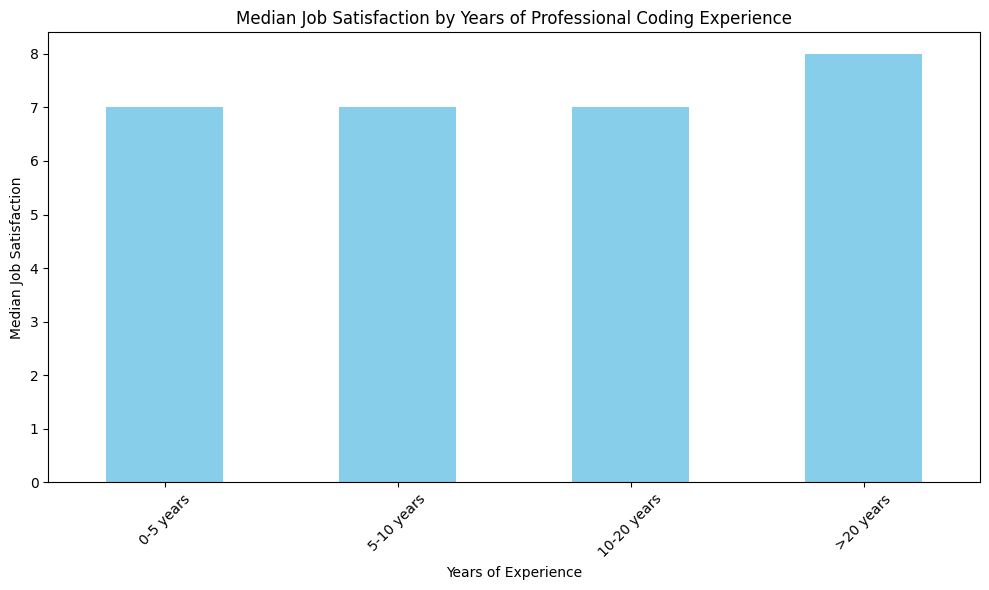

In [6]:
## Write your code here
# Convert 'YearsCodePro' to numeric values, forcing errors to NaN
df.loc[:, 'YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Drop rows with NaN in 'YearsCodePro' column (optional, depending on your dataset)
df = df.dropna(subset=['YearsCodePro'])
bins = [0, 5, 10, 20, float('inf')]  # Experience ranges
labels = ['0-5 years', '5-10 years', '10-20 years', '>20 years']  # Labels for each range

df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)

# Step 2: Calculate Median JobSat for Each Range
median_satisfaction = df.groupby('ExperienceRange')['JobSat'].median()
print(median_satisfaction)
# Step 3: Visualize the Results
plt.figure(figsize=(10, 6))
median_satisfaction.plot(kind='bar', color='skyblue')
plt.title('Median Job Satisfaction by Years of Professional Coding Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Median Job Satisfaction')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


/tmp/ipykernel_345/634227254.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='JobSat', palette='Blues')


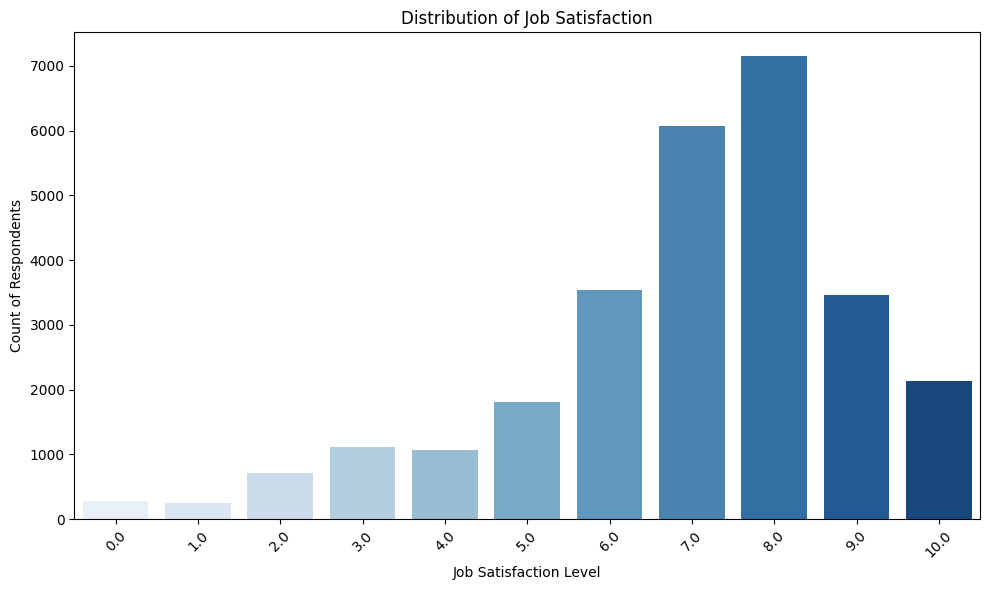

In [7]:
# ## Write your code here
# Visualize the Distribution of JobSat with a Count Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='JobSat', palette='Blues')
plt.title('Distribution of Job Satisfaction')
plt.xlabel('Job Satisfaction Level')
plt.ylabel('Count of Respondents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


/tmp/ipykernel_345/2875721449.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='RemoteWork', palette='Set2')


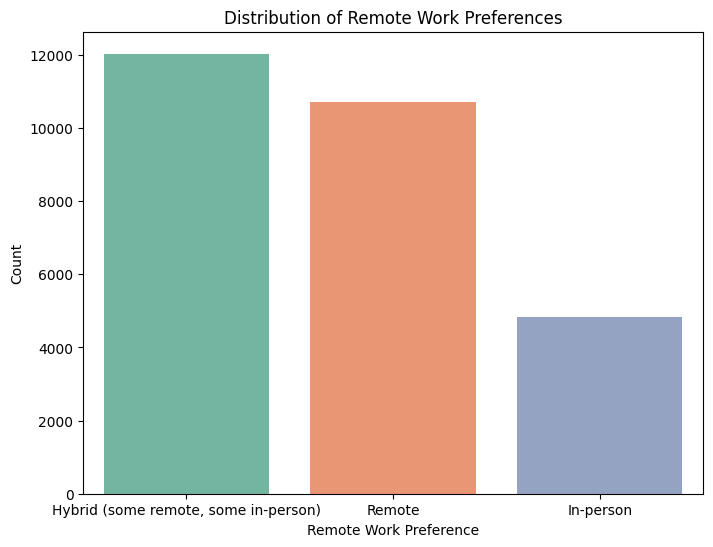

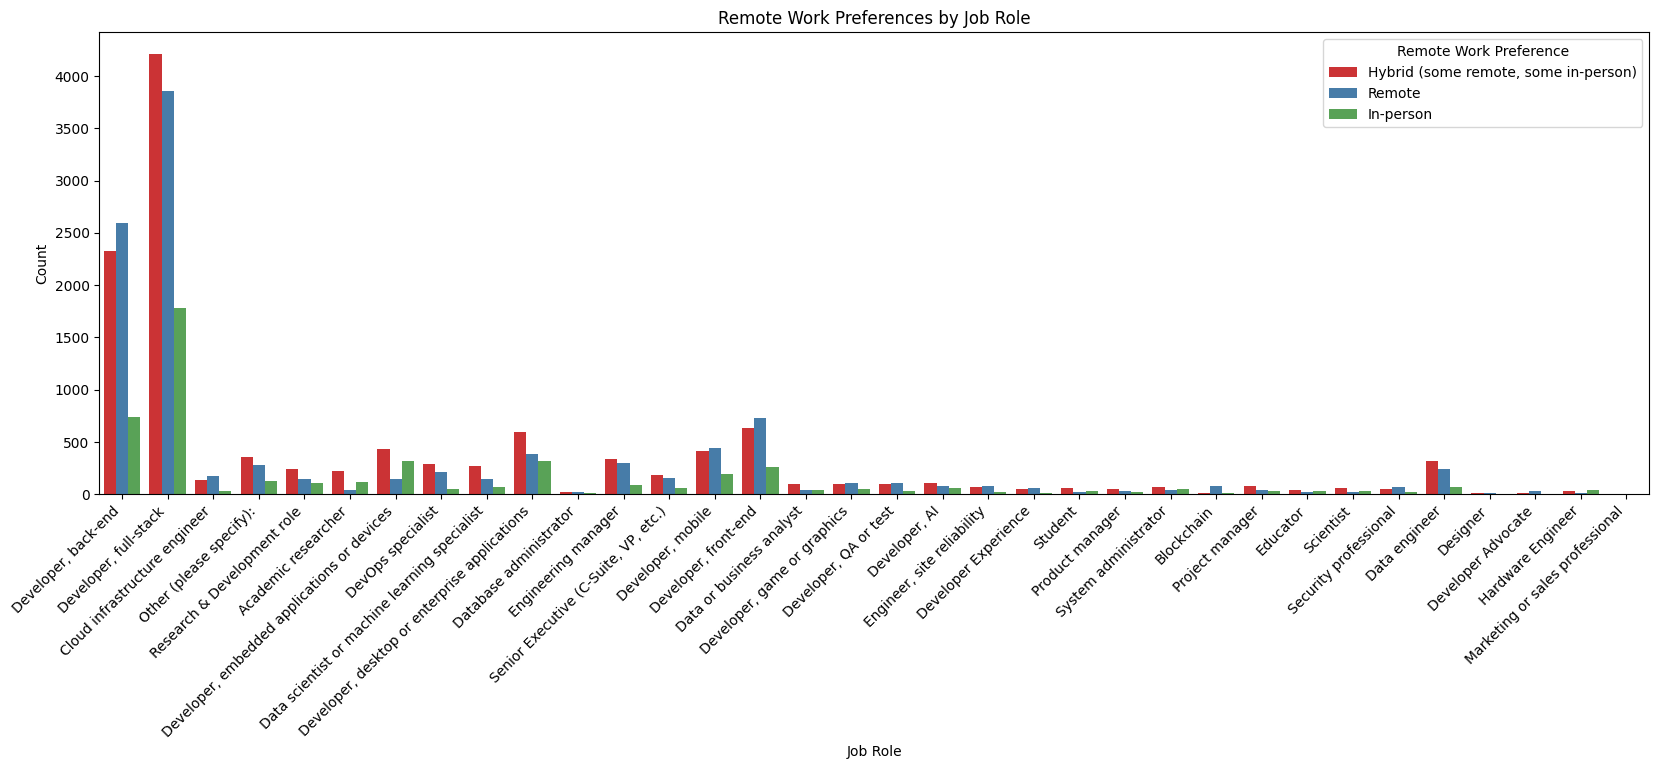

In [8]:
## Write your code here
# Step 1: Visualize Remote Work Distribution with a Count Plot
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='RemoteWork', palette='Set2')
plt.title('Distribution of Remote Work Preferences')
plt.xlabel('Remote Work Preference')
plt.ylabel('Count')
plt.show()
# Cross-tabulation by Employment Type
remote_by_employment = pd.crosstab(df['RemoteWork'], df['Employment'], margins=True, margins_name="Total")
# print("Remote Work Preferences by Employment Type:")
# print(remote_by_employment)

# Cross-tabulation by Job Role
remote_by_role = pd.crosstab(df['RemoteWork'], df['DevType'], margins=True, margins_name="Total")
# print("Remote Work Preferences by Job Role:")
# print(remote_by_role)

# Cross-tabulation visualization
plt.figure(figsize=(20, 6))
sns.countplot(data=df, x='DevType', hue='RemoteWork', palette='Set1')
plt.title('Remote Work Preferences by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Remote Work Preference')
plt.show()


#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


In [27]:
# ## Write your code here
# # Filter data by region or country
# region_df = df[df['Country'].notna()]  # Filter out missing country values

# # Assuming 'LanguageHaveWorkedWith' contains a list of languages, you can split it into a list
# region_df['Languages'] = region_df['LanguageHaveWorkedWith'].str.split(';')  # Split by semicolon

# # Group and count languages per country
# language_counts = (
#     languages_expanded
#     .groupby(['Country', 'Languages'])
#     .size()
#     .reset_index(name='Count')
# )

# # Explode the list so each language gets its own row
# languages_expanded = region_df.explode('Languages')

# # Group by region and language, and count the occurrences
# # language_counts = languages_expanded.groupby(['Country', 'Languages']).size().reset_index(name='Count')

# # Visualize the top programming languages by region using a bar plot or heatmap
# top_languages_per_country = (
#     language_counts
#     .groupby('Country')
#     .apply(lambda x: x.nlargest(5, 'Count'))
#     .reset_index(drop=True)
# )

# plt.figure(figsize=(14, 8))
# sns.barplot(
#     data=top_languages_per_country,
#     x='Count', y='Languages',
#     hue='Country'
# )
# plt.title('Top Programming Languages by Country')
# plt.xlabel('Number of Users')
# plt.ylabel('Programming Language')
# plt.legend(title='Country')
# plt.tight_layout()
# plt.show()


/tmp/ipykernel_345/2230543113.py:35: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(5, 'Count'))


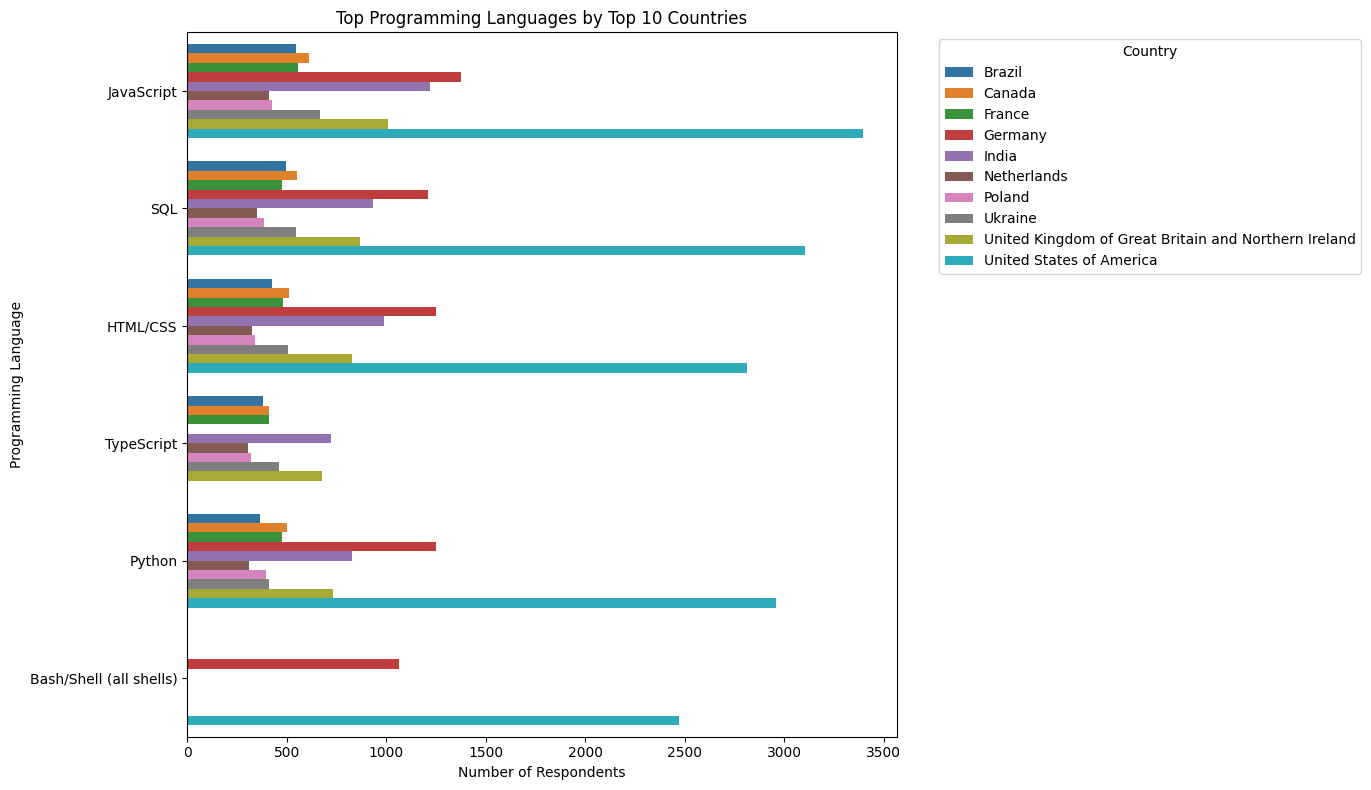

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Drop missing values
df_clean = df[df['Country'].notna() & df['LanguageHaveWorkedWith'].notna()]

# Step 2: Get top 10 countries by number of respondents
top_10_countries = (
    df_clean['Country']
    .value_counts()
    .head(10)
    .index.tolist()
)

# Step 3: Filter dataset to only top 10 countries
df_top_countries = df_clean[df_clean['Country'].isin(top_10_countries)].copy()

# Step 4: Expand the LanguageHaveWorkedWith column
df_top_countries['Languages'] = df_top_countries['LanguageHaveWorkedWith'].str.split(';')
languages_expanded = df_top_countries.explode('Languages')

# Step 5: Group and count
language_counts = (
    languages_expanded
    .groupby(['Country', 'Languages'])
    .size()
    .reset_index(name='Count')
)

# Step 6: Get top 5 languages per country (to keep plot readable)
top_langs_per_country = (
    language_counts
    .groupby('Country')
    .apply(lambda x: x.nlargest(5, 'Count'))
    .reset_index(drop=True)
)

# Step 7: Plot
plt.figure(figsize=(14, 8))
sns.barplot(
    data=top_langs_per_country,
    x='Count', y='Languages',
    hue='Country'
)
plt.title('Top Programming Languages by Top 10 Countries')
plt.xlabel('Number of Respondents')
plt.ylabel('Programming Language')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


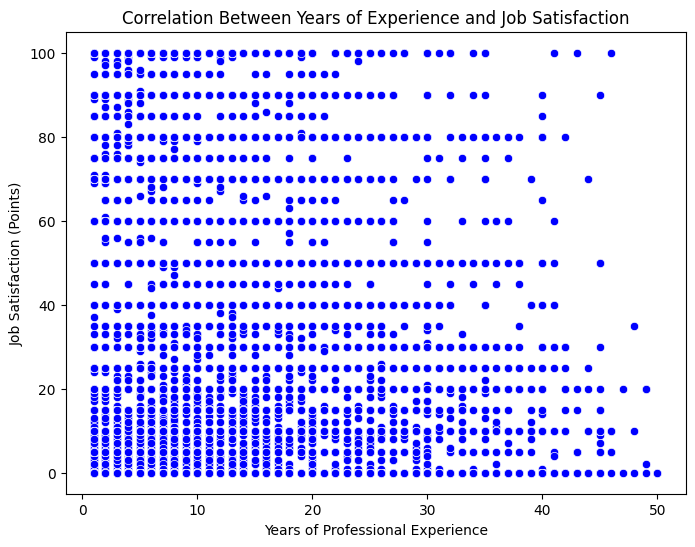

In [10]:
## Write your code here
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='YearsCodePro', y='JobSatPoints_1', color='blue')
plt.title('Correlation Between Years of Experience and Job Satisfaction')
plt.xlabel('Years of Professional Experience')
plt.ylabel('Job Satisfaction (Points)')
plt.show()

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


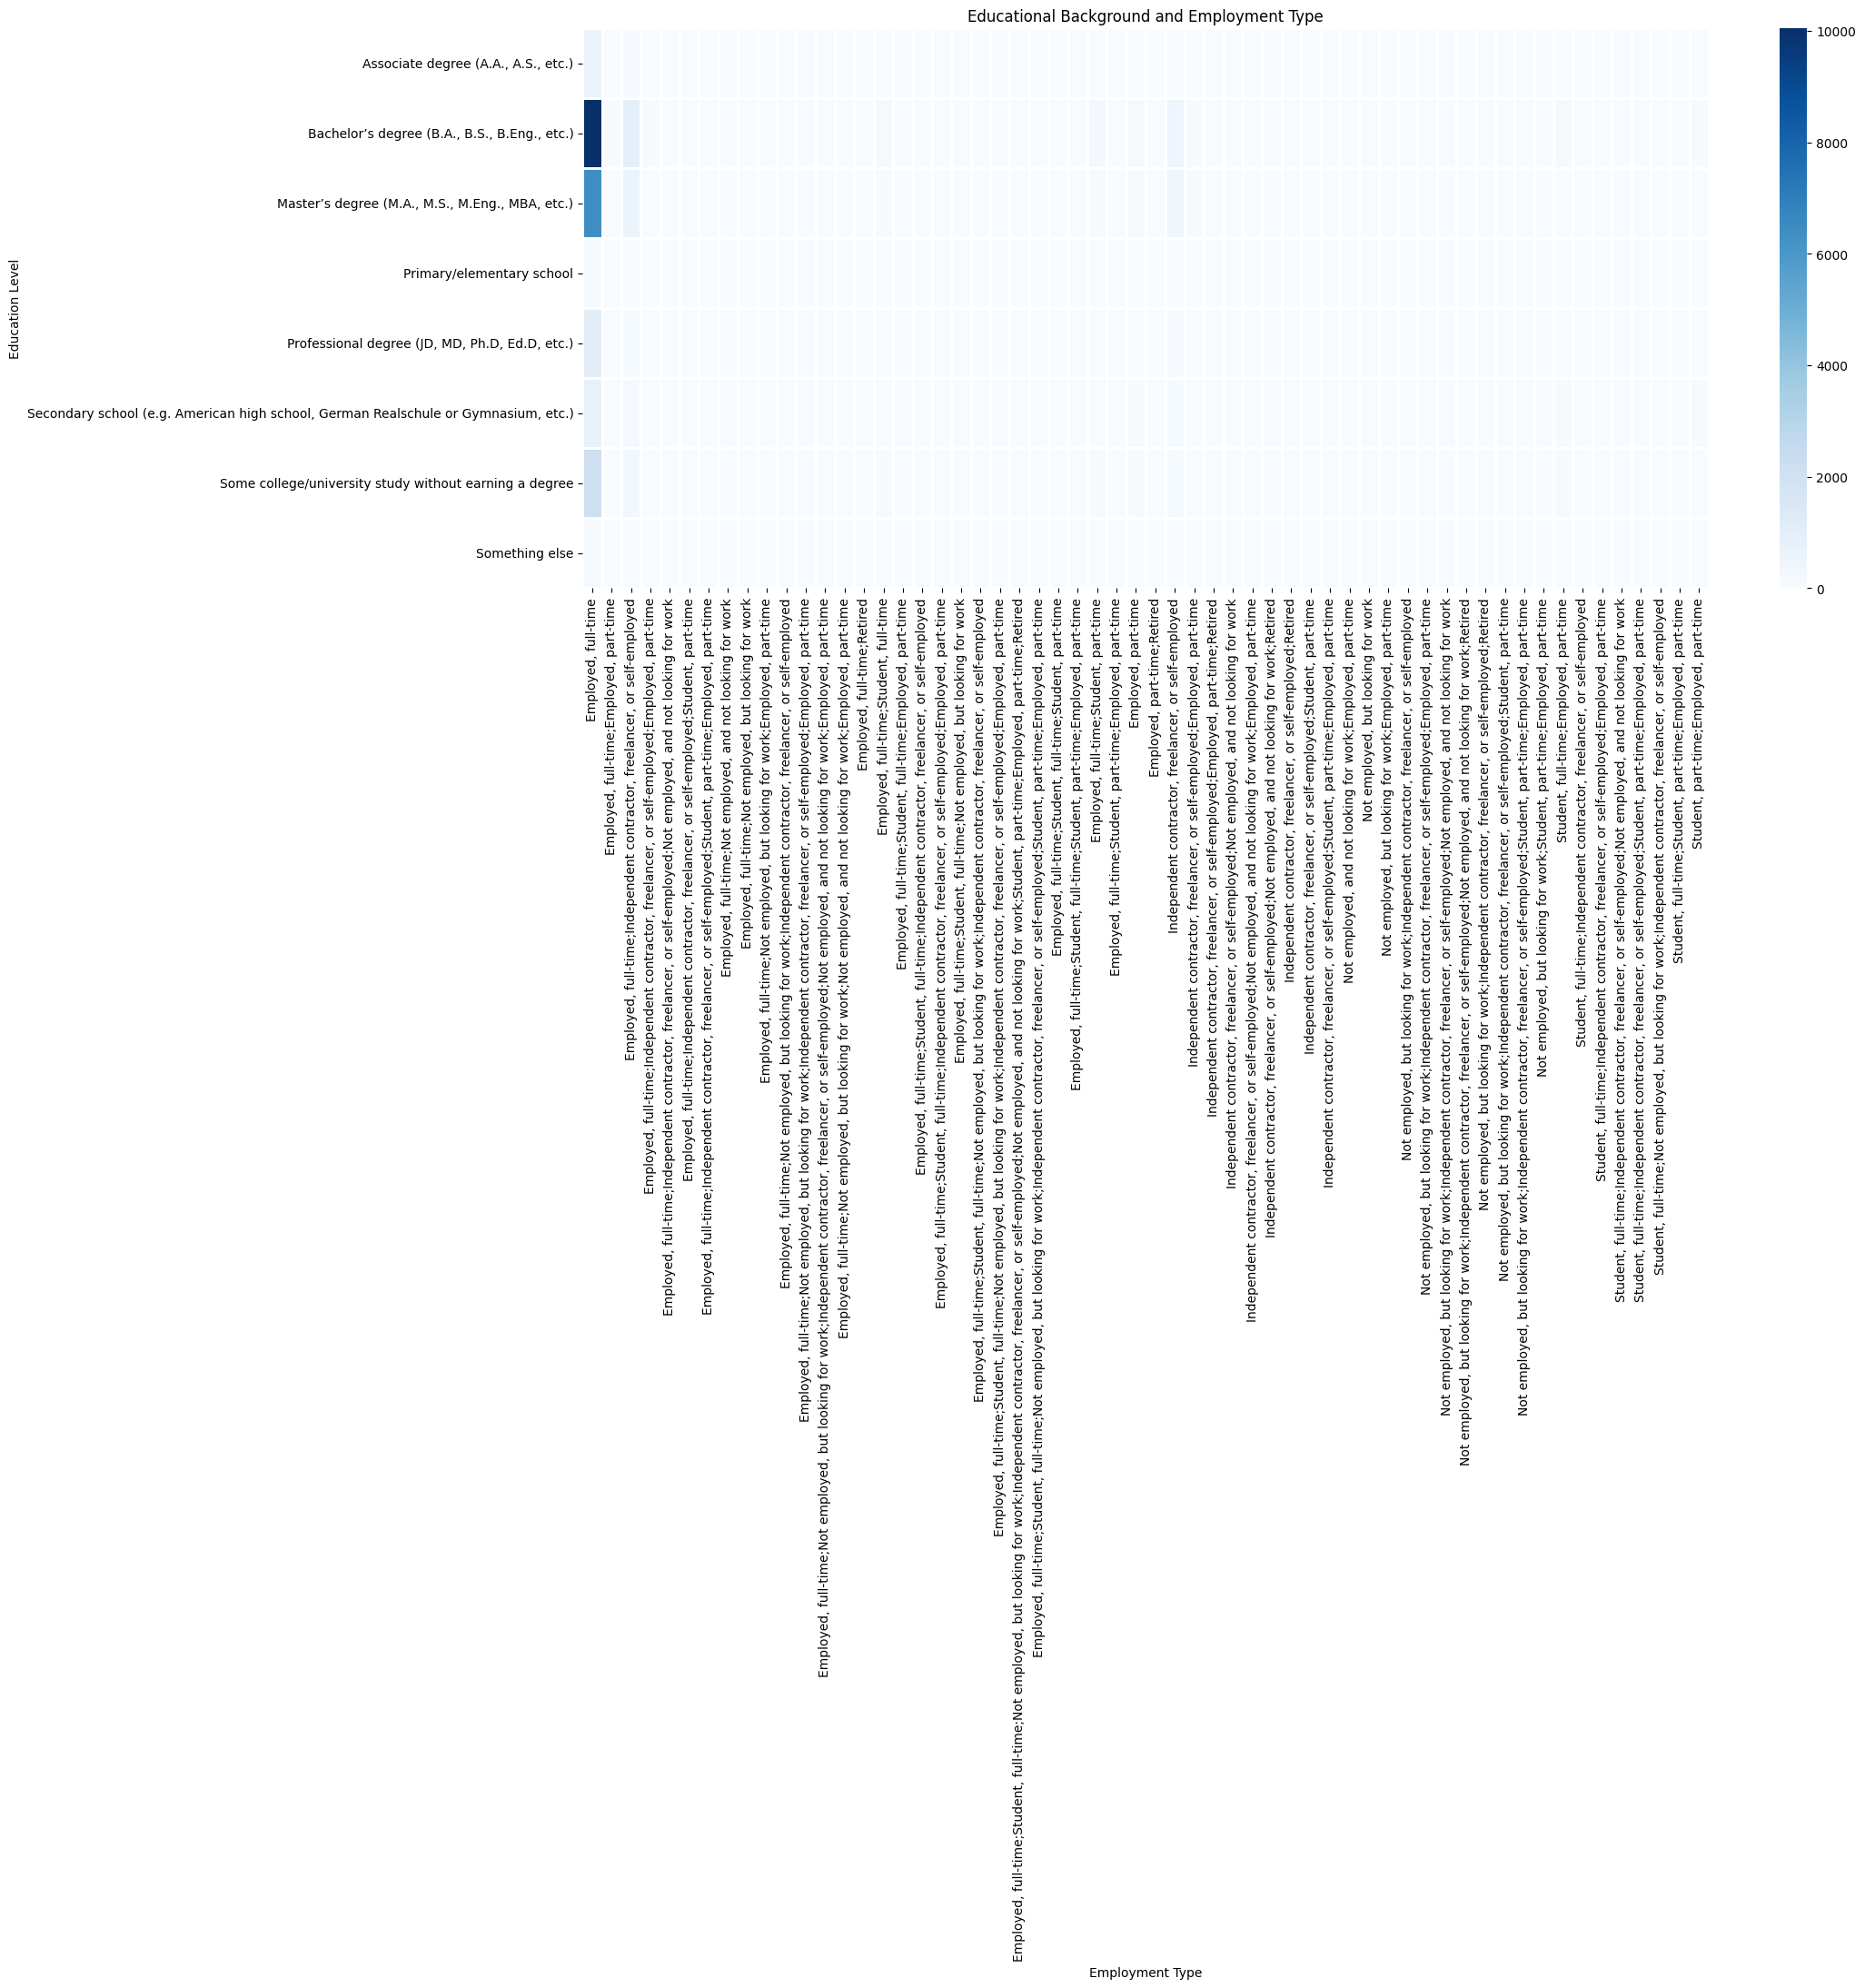

In [16]:
## Write your code here
# Cross-tabulation of education level by employment type
education_employment_crosstab = pd.crosstab(df['EdLevel'], df['Employment'])
# print(education_employment_crosstab)

# Visualize the relationship using a heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(education_employment_crosstab, annot=False, cmap='Blues', fmt='d', linewidths=0.9)
plt.title('Educational Background and Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Education Level')
plt.show()


#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [12]:
## Write your code here
# Save the modified dataset
df.to_csv('cleaned_analyzed_dataset.csv', index=False)


<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
